In [954]:
import itertools
import math
import numpy as np
import scipy.linalg
from scipy.linalg import pinv, inv
import itertools
import matplotlib.pyplot as plt


def l1(x: np.array, y: np.array):
    if x.shape != y.shape:
        raise Exception('Shapes dont match')

    s = 0

    for i in range(len(x)):
        s += abs(y[i] - x[i])
    return s


def l2(x: np.array, y: np.array):
    if x.shape != y.shape:
        raise Exception('Shapes dont match')

    s = 0

    for i in range(len(x)):
        s += (y[i] - x[i]) ** 2
    return s ** (1 / 2)


def linf(x: np.array, y: np.array):
    if x.shape != y.shape:
        raise Exception('Shapes dont match')

    k = x.shape[0]
    s = 0

    for i in range(k):
        s += abs(y[i] - x[i]) ** k
    return s ** (1 / k)


def mean_vector(x):
    """
    na wejsciu podwany jest stojacy wektor np [[1], [1]] a nie [1, 1]
    :param x:
    :return:
    """
    n = x.shape[0]
    mean = np.zeros((1, x.shape[1]))

    for i in range(n):
        mean += x[i]

    mean /= n
    return mean


def covariation_matrix(x: np.array):
    """
    przyjmuje punkt x jako stojacy np. [[1], [2]] a nie [[1, 2]]
    :param x:
    :return:
    """
    n = x.shape[0]

    mean = mean_vector(x)

    print("srednia mi: ", mean)

    summer = np.zeros((x.shape[1], x.shape[1]))

    print("\nmacierz odchylen: \n", x - mean)

    for i in range(n):
        xx = x[i] - mean
        summer += xx.T @ xx

    summer /= n

    print('\nzaokraglona macierz kowariancji: \n', summer.round(3))

    for i in range(summer.shape[0]):
        for j in range(summer.shape[1]):
            if i != j:
                print("\npearson dla cech", i + 1, j + 1, ": ", (summer[i][j] / ((summer[i][i] ** (1 / 2)) * (summer[j][j] ** (1 / 2)))))
                print("zaokraglenie: ", round(summer[i][j] / ((summer[i][i] ** (1 / 2)) * (summer[j][j] ** (1 / 2))), 3))

    return summer



def mahalanobis_distance(x: np.array, c: np.array, mi: np.array):
    """
    przyjmuje punkt x jako stojacy np. [[1], [2]] a nie [[1, 2]]
    """

    x = x.T


    cinv = inv(c)
    xx = x - mi

    return xx @ cinv @ xx.T


def mahalanobis_1d(x_1d, mi_1d, var):
    std = var ** (1/2)

    return abs(x_1d - mi_1d) / std


def fisher_wspolczynnik(mi1, mi2, c1, c2):
    """
        przyjmuje mi1 i mi2 jako stojacy np. [[1, 2]] a nie [[1], [2]]
    :param mi1:
    :param mi2:
    :param c1:
    :param c2:
    :return:
    """
    mi1 = mi1.T
    mi2 = mi2.T

    wspolczynniczki = []

    for i in range(len(mi1)):
        std1 = c1[i][i] ** (1/2)
        std2 = c2[i][i] ** (1/2)
        print("fisher dla cechy ", i, ": ", (abs(mi1[i] - mi2[i]) / (std1 + std2)))
        print("zaokraglenie ", np.round((abs(mi1[i] - mi2[i]) / (std1 + std2)), 3))

        wspolczynniczki.append((abs(mi1[i] - mi2[i]) / (std1 + std2)))

    return wspolczynniczki



def fisher_multidimensions(mi1, mi2, c1, c2):
    mi1 = mi1.T
    mi2 = mi2.T

    zzz = [x for x in range(mi1.shape[1])]
    # print(zzz)
    dimensions = list(itertools.combinations(zzz, 2))
    print('Kombinacje cech', dimensions)

    fishers = []

    for pair in dimensions:
        first = (mi1[0][pair[0]] - mi2[0][pair[0]]) ** 2
        second = (mi1[0][pair[1]] - mi2[0][pair[1]]) ** 2

        upper = (first + second) ** (1/2)
        # print('dec', c1[pair[0]][pair[0]], c1[pair[1]][pair[1]], c2[pair[0]][pair[0]], c2[pair[1]][pair[1]])
        lower = (c1[pair[0]][pair[0]] ** (1/2)) + (c1[pair[1]][pair[1]] ** (1/2)) + (c2[pair[0]][pair[0]] ** (1/2)) + (c2[pair[1]][pair[1]] ** (1/2))
        # lower = (c1[pair[0]][pair[0]]) + (c1[pair[1]][pair[1]]) + (c2[pair[0]][pair[0]]) + (c2[pair[1]][pair[1]])
        # print("lower", lower)

        print("Fisher dla cech ", pair, ": ", (upper/lower))
        print("zaokraglenie: ", np.round((upper/lower), 3))

        fishers.append((upper/lower, pair))

    return fishers



def fisher_multidimensions_poprawiony(mi1, mi2, c1, c2):
    mi1 = mi1.T
    mi2 = mi2.T

    zzz = [x for x in range(mi1.shape[1])]
    # print(zzz)
    dimensions = list(itertools.combinations(zzz, 2))
    print('Kombinacje cech', dimensions)

    fishers = []

    for pair in dimensions:
        first = np.array([mi1[0][pair[0]], mi1[0][pair[1]]])
        second = np.array([mi2[0][pair[0]], mi2[0][pair[1]]])

        upper = l1(first, second)

        # print('dec', c1[pair[0]][pair[0]], c1[pair[1]][pair[1]], c2[pair[0]][pair[0]], c2[pair[1]][pair[1]])
        lower = scipy.linalg.det(c1 + c2)
        # lower = (c1[pair[0]][pair[0]]) + (c1[pair[1]][pair[1]]) + (c2[pair[0]][pair[0]]) + (c2[pair[1]][pair[1]])
        # print("lower", lower)

        print("Fisher dla cech ", pair, ": ", (upper/lower))
        print("zaokraglenie: ", np.round((upper/lower), 3))

        fishers.append((upper/lower, pair))

    return fishers

# Przykladowe dane i obliczenia

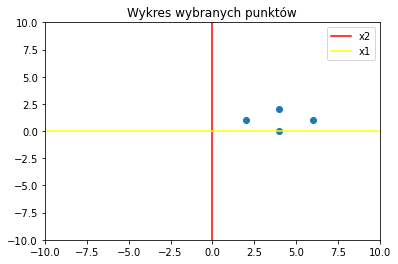

In [955]:
example_x1 = np.array([[2, 1]])
example_x2 = np.array([[4, 0]])
example_x3 = np.array([[6, 1]])
example_x4 = np.array([[4, 2]])

example_x_all = np.vstack((
    example_x1,
    example_x2,
    example_x3,
    example_x4
))

plt.title('Wykres wybranych punktów')
plt.axvline(x=0, c="red", label="x2")
plt.axhline(y=0, c="yellow", label="x1")
plt.xlim((-10, 10))
plt.ylim((-10, 10))
plt.scatter(example_x_all.T[0], example_x_all.T[1])
plt.legend()
plt.show()

# Wyliczanie średniej z próbek

In [956]:
print("Uzyskany wektor probek klasy:")
print(example_x_all)
example_mi = mean_vector(example_x_all)
print("\nObliczony wektor sredni mi: ", example_mi)

Uzyskany wektor probek klasy:
[[2 1]
 [4 0]
 [6 1]
 [4 2]]

Obliczony wektor sredni mi:  [[4. 1.]]


# Obliczanie macierzy kowariancji

In [957]:
example_c = covariation_matrix(example_x_all)

srednia mi:  [[4. 1.]]

macierz odchylen: 
 [[-2.  0.]
 [ 0. -1.]
 [ 2.  0.]
 [ 0.  1.]]

zaokraglona macierz kowariancji: 
 [[2.  0. ]
 [0.  0.5]]

pearson dla cech 1 2 :  0.0
zaokraglenie:  0.0

pearson dla cech 2 1 :  0.0
zaokraglenie:  0.0


# Selekcja cech

In [958]:
### Dodaje inna przykladowa klase

example_mi_B = np.array([[0, 0]])
example_c_B = np.array([[2, 1], [1, 2]])

example_wspolczynniki = fisher_wspolczynnik(example_mi, example_mi_B, example_c, example_c_B)
example_wybrany_wspolczynnik = np.argmax(example_wspolczynniki)

print('\nWybrana zostala cecha: ', example_wybrany_wspolczynnik)

fisher dla cechy  0 :  [1.41421356]
zaokraglenie  [1.414]
fisher dla cechy  1 :  [0.47140452]
zaokraglenie  [0.471]

Wybrana zostala cecha:  0


# Odleglosc Mahalanobisa

In [959]:
example_point = np.array([[4], [4]])

print('Odleglosci mahalanobisa od punktu ', example_point.T, 'do klasy pierwszej', example_mi, 'oraz drugiej ', example_mi_B, '\n')

### Uwaga punkt do obliczenia dystansu od klasy podajemy jako wektor stojacy, natomiast mi, bez zmian, jako lezacy
d1 = mahalanobis_distance(example_point, example_c, example_mi)
print('Odleglosc mahalanobisa od pierwszej klasy', d1)

d2 = mahalanobis_distance(example_point, example_c_B, example_mi_B)
print('Odleglosc mahalanobisa od drugiej klasy', d2)

print('\nMniejsza odleglosc okresla przynaleznosc do klasy, wiec probka zostaja zaklasyfikowana jako', 'klasa pierwsza' if d1 < d2 else 'klasa druga')

Odleglosci mahalanobisa od punktu  [[4 4]] do klasy pierwszej [[4. 1.]] oraz drugiej  [[0 0]] 

Odleglosc mahalanobisa od pierwszej klasy [[18.]]
Odleglosc mahalanobisa od drugiej klasy [[10.66666667]]

Mniejsza odleglosc okresla przynaleznosc do klasy, wiec probka zostaja zaklasyfikowana jako klasa druga


# Odleglosc Mahalanobisa dla jednej cechy

In [960]:
### Dalej wybieramy druga ceche, jako ta o wiekszym wspolczynniku

print('Odleglosci mahalanobisa dla cechy', example_wybrany_wspolczynnik, ' od punktu ', example_point.T, 'do klasy pierwszej', example_mi, 'oraz klasy drugiej ', example_mi_B, '\n')

d1_1 = mahalanobis_1d(example_point[example_wybrany_wspolczynnik], example_mi[0][example_wybrany_wspolczynnik], example_c[example_wybrany_wspolczynnik][example_wybrany_wspolczynnik])
print('Odleglosc mahalanobisa od pierwszej klasy dla cechy ', example_wybrany_wspolczynnik, ': ', d1_1)

d2_1 = mahalanobis_1d(example_point[example_wybrany_wspolczynnik], example_mi_B[0][example_wybrany_wspolczynnik], example_c_B[example_wybrany_wspolczynnik][example_wybrany_wspolczynnik])
print('Odleglosc mahalanobisa od drugiej klasy dla cechy ', example_wybrany_wspolczynnik, ': ', d2_1)

print('\nMniejsza odleglosc w przestrzeni jednej cechy okresla przynaleznosc do klasy, wiec probka zostaja zaklasyfikowana jako', 'klasa pierwsza' if d1_1 < d2_1 else 'klasa druga')

Odleglosci mahalanobisa dla cechy 0  od punktu  [[4 4]] do klasy pierwszej [[4. 1.]] oraz klasy drugiej  [[0 0]] 

Odleglosc mahalanobisa od pierwszej klasy dla cechy  0 :  [0.]
Odleglosc mahalanobisa od drugiej klasy dla cechy  0 :  [2.82842712]

Mniejsza odleglosc w przestrzeni jednej cechy okresla przynaleznosc do klasy, wiec probka zostaja zaklasyfikowana jako klasa pierwsza


# Najlepsza jednowymiarowa cecha z trojwymiarowego zbioru

In [961]:
ww1 = np.array([[0], [-1], [-8]])
ww2 = np.array([[5] ,[1], [-1]])

cc1 = np.array([[1, 1, 0], [1, 2, -1], [0, -1, 4]])
cc2 = np.array([[2, 0, 0], [0, 1, 1], [0, 1, 2]])

example_3d_best_feature = fisher_wspolczynnik(ww1.T, ww2.T, cc1, cc2)

print('\nWybrana zostala cecha: ', np.argmax(example_3d_best_feature))

fisher dla cechy  0 :  [2.07106781]
zaokraglenie  [2.071]
fisher dla cechy  1 :  [0.82842712]
zaokraglenie  [0.828]
fisher dla cechy  2 :  [2.05025253]
zaokraglenie  [2.05]

Wybrana zostala cecha:  0


# Najlepsza dwuwymiarowa przestrzen cech z trojwymiarowego zbioru

In [962]:
example_3d_features = fisher_multidimensions(ww1, ww2, cc1, cc2)

print('\nWybrane zostaly cechy: ', max(example_3d_features, key=lambda qwe: qwe[0])[1])

Kombinacje cech [(0, 1), (0, 2), (1, 2)]
Fisher dla cech  (0, 1) :  1.1153041493647022
zaokraglenie:  1.115
Fisher dla cech  (0, 2) :  1.4759256799350016
zaokraglenie:  1.476
Fisher dla cech  (1, 2) :  1.2490693858675541
zaokraglenie:  1.249

Wybrane zostaly cechy:  (0, 2)


In [963]:
example_3d_features = fisher_multidimensions_poprawiony(ww1, ww2, cc1, cc2)

print('\nWybrane zostaly cechy: ', max(example_3d_features, key=lambda qwe: qwe[0])[1])

Kombinacje cech [(0, 1), (0, 2), (1, 2)]
Fisher dla cech  (0, 1) :  0.14583333333333334
zaokraglenie:  0.146
Fisher dla cech  (0, 2) :  0.25
zaokraglenie:  0.25
Fisher dla cech  (1, 2) :  0.1875
zaokraglenie:  0.188

Wybrane zostaly cechy:  (0, 2)


In [964]:
a = np.array([[0, 0]]).T
b = np.array([[1, 1]]).T
c = np.array([[0, 0.7]]).T

print(l1(a, c))
print(l1(b, c))

print(l2(a, c))
print(l2(b, c))

print(linf(a, c))
print(linf(b, c))

[0.7]
[1.3]
[0.7]
[1.04403065]
[0.7]
[1.04403065]


In [965]:
a = np.array([[-2, -2], [-1, 1], [1, -1], [2, 2]])
c = covariation_matrix(a)
c

srednia mi:  [[0. 0.]]

macierz odchylen: 
 [[-2. -2.]
 [-1.  1.]
 [ 1. -1.]
 [ 2.  2.]]

zaokraglona macierz kowariancji: 
 [[2.5 1.5]
 [1.5 2.5]]

pearson dla cech 1 2 :  0.5999999999999999
zaokraglenie:  0.6

pearson dla cech 2 1 :  0.5999999999999999
zaokraglenie:  0.6


array([[2.5, 1.5],
       [1.5, 2.5]])

In [966]:
miX = mean_vector(a)

dd = np.array([4, -4])

ddd = np.array([4, 4])

mahalanobis_distance(dd, c, miX)

array([[32.]])

In [967]:
mahalanobis_distance(ddd, c, miX)

array([[8.]])

In [968]:
prupki = np.array([[2, 4, 6, 4], [1, 0, 1, 2]]).T
print(prupki)

miP = mean_vector(prupki)

maciesz = covariation_matrix(prupki)

[[2 1]
 [4 0]
 [6 1]
 [4 2]]
srednia mi:  [[4. 1.]]

macierz odchylen: 
 [[-2.  0.]
 [ 0. -1.]
 [ 2.  0.]
 [ 0.  1.]]

zaokraglona macierz kowariancji: 
 [[2.  0. ]
 [0.  0.5]]

pearson dla cech 1 2 :  0.0
zaokraglenie:  0.0

pearson dla cech 2 1 :  0.0
zaokraglenie:  0.0


In [969]:
inv_maciesz = pinv(maciesz)

In [970]:
punkt = np.array([[4], [4]])
mahalanobis_distance(punkt, maciesz, miP)

# l2(punkt.T, miP.T)

array([[18.]])

In [971]:
mahalanobis_1d(0, 1.5, 1.25)

1.3416407864998738

In [972]:
w1 = np.array([[1.5], [1.5]])
w2 = np.array([[-2], [-2]])

cw1 = np.array([[1.25, -1], [-1, 1.25]])
cw2 = np.array([[3, 1], [1, 1]])

fisher_wspolczynnik(w1, w2, cw1, cw2)

fisher dla cechy  0 :  [1.22803364 1.22803364]
zaokraglenie  [1.228 1.228]


[array([1.22803364, 1.22803364])]

In [973]:
ww1 = np.array([[0], [-1], [-8]])
ww2 = np.array([[5] ,[1], [-1]])

cc1 = np.array([[1, 1, 0], [1, 2, -1], [0, -1, 4]])
cc2 = np.array([[2, 0, 0], [0, 1, 1], [0, 1, 2]])

fisher_multidimensions(ww1, ww2, cc1, cc2)

Kombinacje cech [(0, 1), (0, 2), (1, 2)]
Fisher dla cech  (0, 1) :  1.1153041493647022
zaokraglenie:  1.115
Fisher dla cech  (0, 2) :  1.4759256799350016
zaokraglenie:  1.476
Fisher dla cech  (1, 2) :  1.2490693858675541
zaokraglenie:  1.249


[(1.1153041493647022, (0, 1)),
 (1.4759256799350016, (0, 2)),
 (1.2490693858675541, (1, 2))]